Generar una superficie de dióxido de titanio ($TiO_2$) en el plano (110) con una supercelda (2x2x2) que contenga 24 átomos. 

Coloca un átomo de flúor en dos posiciones: 

* Sobre un átomo de titanio 
* Sobre un átomo de oxígeno en la superficie. 

Exporta los archivos para Quantum ESPRESSO y optimiza ambas configuraciones.

In [15]:
from ase.spacegroup import crystal
from ase.build import surface, make_supercell,cut
from ase.io import write
from ase import Atom
from ase.visualize import view

## Creando la superficie de dióxido de titanio

In [16]:
# Parámetros de red del rutilo TiO2
a = 4.5937  # Longitud del eje a (Å)
c = 2.9581  # Longitud del eje c (Å)
u = 0.305   # Posición fraccionaria del oxígeno

# Crear la celda base de rutilo (TiO2)
rutile = crystal(
    symbols=['Ti', 'O'],  # Especies atómicas
    basis=[
        [0, 0, 0],         # Ti en (0, 0, 0)
        [u, u, 0],         # O en (u, u, 0)
        [-u, -u, 0],       # O en (-u, -u, 0)
    ],
    spacegroup=136,        # Grupo espacial P42/mnm
    cellpar=[a, a, c, 90, 90, 90],  # Parámetros de la celda
)

# Generar la superficie (110)
surface_tio2 = surface(rutile, (1, 1, 0), layers=1, vacuum=8.0)  # 3 capas y 8 Å de vacío

# Expandir la celda a una supercelda (2x2x2)
#supercell = make_supercell(surface_tio2, [[2, 0, 0], [0, 2, 0], [0, 0, 1]])

# Ajustar el número de átomos a 24 
supercell = make_supercell(surface_tio2, [[2, 0, 0], [0, 2, 0], [0, 0, 1]])  # Superficie 2x2x2

# Visualización del resultado
view(supercell)

/home/hernan-barquero/anaconda3/lib/python3.12/site-packages/ase/spacegroup/spacegroup.py:479: UserWarning: scaled_positions 1 and 2 are equivalent
  warnings.warn(


<Popen: returncode: None args: ['/home/hernan-barquero/anaconda3/bin/python'...>

## Fluor sobre Titanio

In [ ]:
supercell_over_Ti = make_supercell(surface_tio2, [[2, 0, 0], [0, 2, 0], [0, 0, 1]])  # Redefinir la supercelda para evitar duplicados

# Posición del átomo de flúor sobre un átomo de titanio
pos_ti = supercell_over_Ti.positions[0]  # Índice ajustado manualmente para Ti

# Añadir átomo de flúor
fluor_ti = pos_ti + [0, 0, 1.5]  # F a 1.5 Å sobre Ti

supercell_over_Ti.append(Atom('F', fluor_ti))

view(supercell_over_Ti)

<Popen: returncode: None args: ['/home/hernan-barquero/anaconda3/bin/python'...>

In [ ]:
# Genera un archivo de entrada para Quantum ESPRESSO con la configuración 
write("F_over_Ti/pw.in", supercell_over_Ti, format="espresso-in", 
	pseudopotentials={
    "F": "F.pbe-n-kjpaw_psl.1.0.0.UPF",
    "O": "O.pbe-n-kjpaw_psl.1.0.0.UPF" ,
	"Ti": "Ti.pbe-spn-kjpaw_psl.1.0.0.UPF"
}, input_data={
    "control": {
        "calculation": "relax",           # Indica que se hará una relajación de la estructura.
        "prefix": "TiO2-Ti^F",    # Prefijo para los archivos de salida generados por Quantum ESPRESSO.
        "outdir": ".",             # Carpeta donde se guardarán los archivos temporales de Quantum ESPRESSO.
        "pseudo_dir": "/home/ebarquero/practicas/p2/pseudo/",          # Carpeta donde se encuentran los pseudopotenciales.
		"tstress": True,
		"tprnfor": True
    },
    "system": {
        "ecutwfc": 60,                    # Corte de energía para las funciones de onda (en Ry).
        "ecutrho": 600,                   # Corte de energía para la densidad de carga (en Ry).
        "occupations": "smearing",        # Usa un método de smearing para las ocupaciones electrónicas.
        "smearing": "mp",                 # Método de smearing: Methfessel-Paxton.
        "degauss": 0.02 ,                  # Ancho del smearing en Ry.
		"ibrav":0, 							# Define una celda generica
    },
    "electrons": {
        "conv_thr": 1e-6                  # Criterio de convergencia para las iteraciones electrónicas.
    }
}, kpts = (3,3,3),koffset = (0,0,0))

## Fluor sobre oxígeno

In [ ]:
supercell_over_O = make_supercell(surface_tio2, [[2, 0, 0], [0, 2, 0], [0, 0, 1]])  # Redefinir la supercelda para evitar duplicados
# Posición del átomo de flúor sobre un átomo de titanio
pos_o = supercell.positions[1]   # Índice ajustado manualmente para O

# Añadir átomo de flúor
fluor_o = pos_o + [0, 0, 1.5]    # F a 1.5 Å sobre O
supercell_over_O.append(Atom('F', fluor_o))

view(supercell_over_O)

In [ ]:
# Genera un archivo de entrada para Quantum ESPRESSO con la configuración 
write("F_over_O/pw.in", supercell_over_O, format="espresso-in", 
	pseudopotentials={
    "F": "F.pbe-n-kjpaw_psl.1.0.0.UPF",
    "O": "O.pbe-n-kjpaw_psl.1.0.0.UPF" ,
	"Ti": "Ti.pbe-spn-kjpaw_psl.1.0.0.UPF"
}, input_data={
    "control": {
        "calculation": "relax",           # Indica que se hará una relajación de la estructura.
        "prefix": "TiO2-O^F",    # Prefijo para los archivos de salida generados por Quantum ESPRESSO.
        "outdir": ".",             # Carpeta donde se guardarán los archivos temporales de Quantum ESPRESSO.
        "pseudo_dir": "/home/ebarquero/practicas/p2/pseudo/",          # Carpeta donde se encuentran los pseudopotenciales.
		"tstress": True,
		"tprnfor": True
    },
    "system": {
        "ecutwfc": 65,                    # Corte de energía para las funciones de onda (en Ry).
        "ecutrho": 520,                   # Corte de energía para la densidad de carga (en Ry).
        "occupations": "smearing",        # Usa un método de smearing para las ocupaciones electrónicas.
        "smearing": "mp",                 # Método de smearing: Methfessel-Paxton.
        "degauss": 0.02 ,                  # Ancho del smearing en Ry.
		"ibrav":0, 							# Define una celda generica
    },
    "electrons": {
        "conv_thr": 1e-6                  # Criterio de convergencia para las iteraciones electrónicas.
    }
}, kpts = (3,3,3),koffset = (0,0,0))

# Hasta aqui estandarice la creacion de las moleculas

In [5]:
from ase.io import read

# Cargar el archivo pw.out
atoms = read('pw.out') 

# Mostrar información sobre el sistema
print(atoms)
print(atoms.positions)  # Posiciones de los átomos
print(atoms.get_potential_energy())  # Energía potencial total



Atoms(symbols='Ti2O4Ti2O4Ti2O4Ti2O4F2', pbc=True, cell=[12.99294567702021, 5.916194891628705, 17.981418261418316], calculator=SinglePointDFTCalculator(...))
[[ 0.          0.          7.99999962]
 [ 3.24823642  1.47904937  7.99999962]
 [ 0.          0.          9.98142384]
 [ 3.24823642  0.          9.26681182]
 [ 1.2668122   1.47904937  7.99999962]
 [ 5.22966064  1.47904937  7.99999962]
 [ 0.          2.95810004  7.99999962]
 [ 3.24823642  4.43714942  7.99999962]
 [ 0.          2.95810004  9.98142384]
 [ 3.24823642  2.95810004  9.26681182]
 [ 1.2668122   4.43714942  7.99999962]
 [ 5.22966064  4.43714942  7.99999962]
 [ 6.49647284  0.          7.99999962]
 [ 9.74470926  1.47904937  7.99999962]
 [ 6.49647284  0.          9.98142384]
 [ 9.74470926  0.          9.26681182]
 [ 7.76328504  1.47904937  7.99999962]
 [11.72613347  1.47904937  7.99999962]
 [ 6.49647284  2.95810004  7.99999962]
 [ 9.74470926  4.43714942  7.99999962]
 [ 6.49647284  2.95810004  9.98142384]
 [ 9.74470926  2.9581000

In [6]:
from ase.visualize import view
view(atoms)  # Esto abre una ventana interactiva para visualizar la estructura


<Popen: returncode: None args: ['/home/hernan-barquero/anaconda3/bin/python'...>

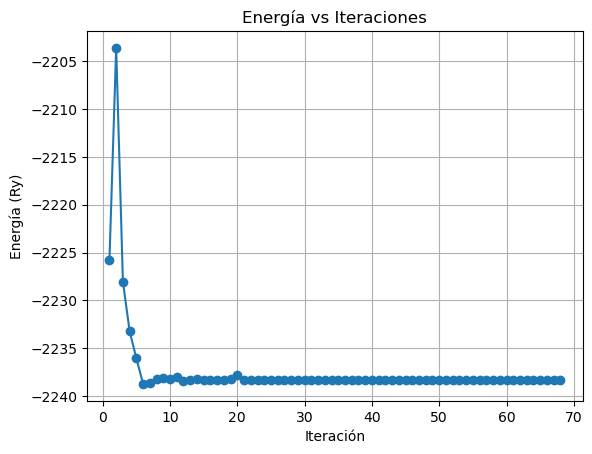

In [7]:
import re
import matplotlib.pyplot as plt

# Cargar el archivo pw.out
Result_TiO2F = 'pw.out'
with open(Result_TiO2F, 'r') as file:
    content = file.read()

# Buscar todas las energías en las iteraciones usando expresión regular
energies = re.findall(r'total energy\s+=\s+(-?\d+\.\d+)', content)

# Convertir las energías a tipo flotante
energies = [float(e) for e in energies]

# Graficar energía vs iteraciones
plt.plot(range(1, len(energies) + 1), energies,'-o')
plt.xlabel('Iteración')
plt.ylabel('Energía (Ry)')
plt.title('Energía vs Iteraciones')
plt.grid(True)
plt.show()

